# **Linear Regression**

Linear regression is a technique for modeling the relationship between a dependent variable (Y) and one independent variable (X). It assumes that there is a linear relationship between X and Y, and tries to fit a straight line that best describes this relationship.



**Given an advertising data, build a model to predict the sales based on the money spent on different platforms for marketing. Implement an ordinary least squares linear regression to test the accuracy of the model.**

The ordinary least squares (OLS) method is the most common approach used to estimate the parameters of a linear regression model. In this method, the objective is to find the line that minimizes the sum of the squared differences between the predicted values and the actual values of the dependent variable.

***Import required libraries***

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

***Data Reading***

In [2]:
c1 = "advertising.csv"

In [3]:
c1 = "advertising.csv"
# load the data into a pandas dataframe
df = pd.read_csv(c1)
df = pd.DataFrame(df)
print(df)


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


***Data Inspection***

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


***Data Cleaning***

In [5]:
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

***Correlation between columns***

<Axes: >

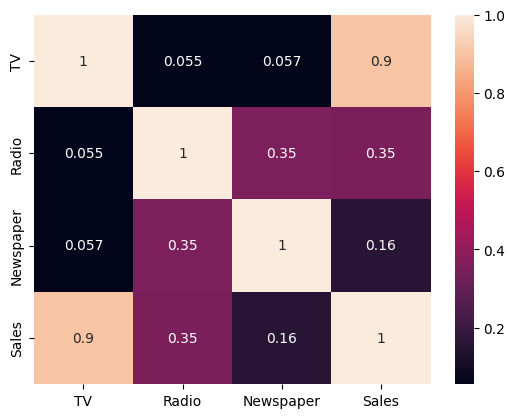

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(),annot = True)

***Select feature and target column based on correlation***

In [6]:
# separate the target variable and the feature
X = df[['TV']]
y = df['Sales']

***Split data into Train and test set***

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 41)


***Building a Linear Regression Model***

In [8]:
# create a linear regression model

model = LinearRegression()

# fit the model to the training data
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


***Predictions on the Test Set***

In [9]:
y_pred = model.predict(x_test)

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the x_test data like you did for x_train and then you can simply go on and predict the y values corresponding to x_test using the predict attribute of the fitted regression line.

***Looking at the RMSE***

In [10]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.1508091144724597)

***Checking the R-squared on the test set***

In [11]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8367991793978931

***Visualizing the fit on the test set***

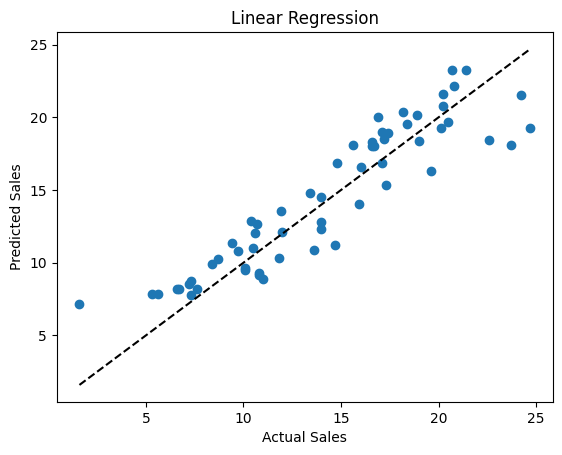

In [12]:
# plot the actual and predicted values
plt.scatter(y_test, y_pred)

# add labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')

# add a diagonal line to show where predictions would be perfect
lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, 'k--')

# show the plot
plt.show()
